# 优化ONNX推理 
## （量化onnxruntime 改变weight_tpye ,optimizer = True）生成一个新的模型
https://www.lanqiao.cn/courses/40981/learning/?id=2813911&compatibility=false

<mark>ERROR</mark>
* append()追加 与extend()拓展  
extend拓展保持数据类型不发生改变，append 直接将变量加入其中，可能破坏数据的结构导致出错
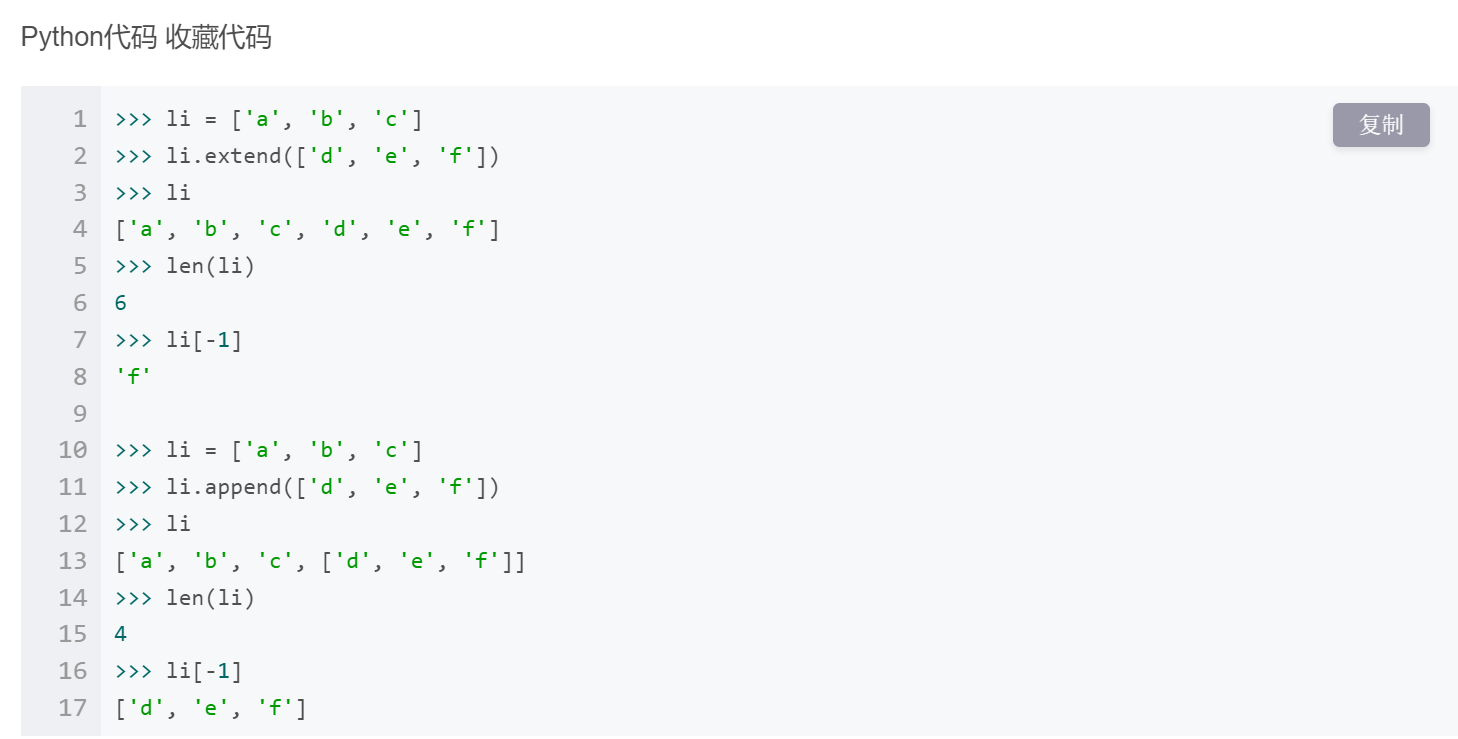
https://blog.csdn.net/u011361880/article/details/76556399

* batch 操作：先得到序号，再使用切片[]
```python
for i in range(0, len(input_data), batch_size):
        batch_data = input_data[i: i+batch_size]
        batch_output = session.run(None,{'input':batch_data})[0]
        output.extend(batch_output.tolist())
```

---
# 手打答案
```python
import os
import onnxruntime as ort
from flask import Flask, request, jsonify
import numpy as np
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

app = Flask(__name__)

if os.path.isfile('inference_model_quantized.onnx'):
    session = ort.InferenceSession("inference_model_quantized.onnx")
else:
    session = ort.InferenceSession("inference_model.onnx")

def quantize_model(model_input='inference_model.onnx', model_output="inference_model_quantized.onnx"):
    #TODO
    quantize_dynamic(model_input=model_input, model_output=model_output,optimize_model=True,weight_type=QuantType.QUInt8)
    

def inference(data, batch_size):
    input_data = np.array(data).astype(np.float32)
    #TODO
    output = []

    for i in range(0, len(input_data), batch_size):
        batch_data = input_data[i: i+batch_size]
        batch_output = session.run(None,{'input':batch_data})[0]
        output.extend(batch_output.tolist())
    
    return output

@app.route('/', methods=['POST'])
def main():
    input_data = request.get_json()['input']
    output = inference(input_data, batch_size=10)
    return jsonify({'output': output})


if __name__ == '__main__':
    quantize_model()
    app.run(port=8080)
```